# Exercise 3: Perceptron

## 3.1 Perceptron for data classification

In order to demonstrate the main concepts behind the perceptron, we have to define input and output data. We will use $N$ two-dimensional vectors $\mathbf{a}_i$ as input data organized in a $2\times N$ matrix $\mathbf{A}$ (two rows and $N$ columns).

$\mathbf{A}=\begin{bmatrix}
    a_{x_1} & a_{x_2} & \dots & a_{x_N}\\
    a_{y_1} & a_{y_2} & \dots & a_{y_N}
\end{bmatrix}$

Here, $N$ is the number of vectors and $a_{x_i}$, $a_{y_i}$ are the $x$ and $y$ coordinates of $i$-th vector. In this example we will demonstrate how to classify vectors in two classes. In this case, each vector can belong to only one of two possible classes, for example $C_0$ and $C_1$. Classes of each examples are defined using a matrix \mathbf{C}, whose dimensions are $1\times N$ defined as follows:

$\mathbf{C}=\left[c_1, c_2, \dots, c_N\right]$

Each element $c_i$ has value $0$ if vector $\mathbf{a}_i$ belongs to class $C_0$ and has value $1$ if vector belongs to class $C_1$.

### 3.1.1 Classification of linearly separable examples in 2D space

In this experiment we will show how to use the perceptron in order to classify a vector in two linearly separable classes. We will use the following vectors as input vectors:

In [1]:
import numpy as np

a1=np.array([[1, 1]]).T
a2=np.array([[1, 1]]).T
a3=np.array([[2, 0]]).T
a4=np.array([[1, 2]]).T
a5=np.array([[2, 1]]).T

Here, vectors $\mathbf{a}_1$, $\mathbf{a}_2$ and $\mathbf{a}_3$ belong to class $C_0$ and other vectors belong to class $C_1$.

**Tasks**

1. Form the matrices $\mathbf{A}$ and $\mathbf{C}$ as explained.
2. Plot the vectors. Vectors belonging to the same class have the same color in the plot.

In [7]:
# Write your code here
A = np.hstack([a1, a2, a3, a4, a5])
print(A)
C = np.matrix([0, 0, 0, 1, 1])
print(C)

[[1 1 2 1 2]
 [1 1 0 2 1]]
[[0 0 0 1 1]]


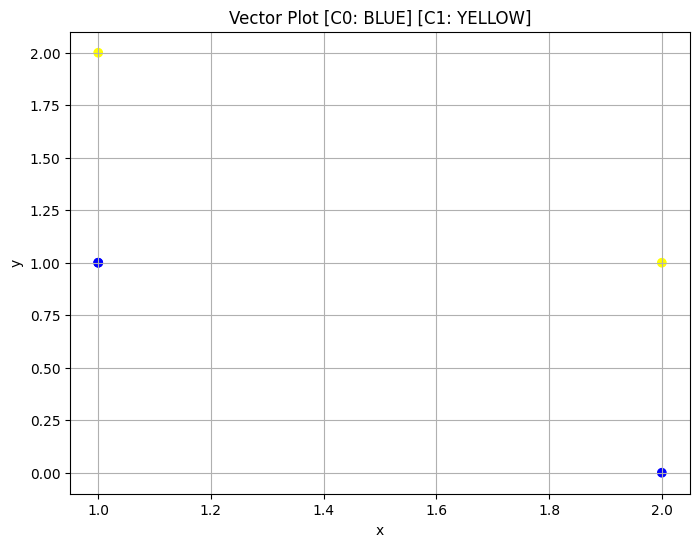

In [45]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(A[0, :], A[1, :], color=[["blue", "yellow"][C[0, i]] for i in range(A.shape[1])])    
plt.xlabel('x')
plt.ylabel('y')
plt.title("Vector Plot [C0: BLUE] [C1: YELLOW]")
plt.grid()
plt.show()

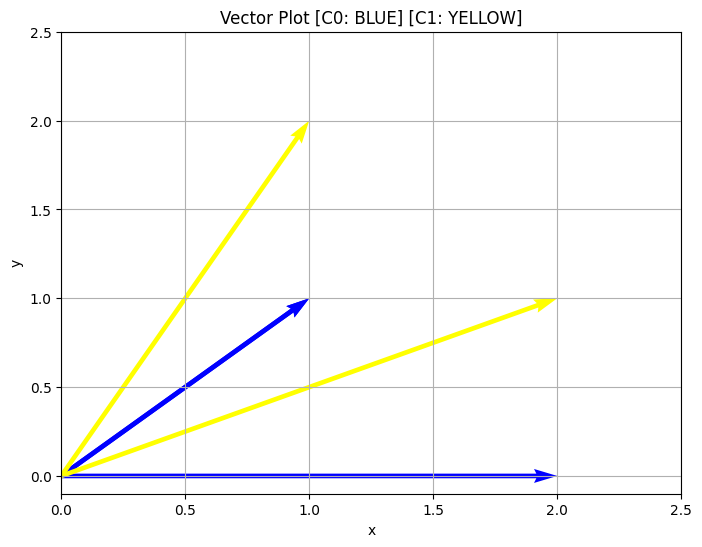

In [46]:
plt.figure(figsize=(8, 6))   
plt.quiver([0] * 5, [0] * 5, A[0, :], A[1, :], color=[["blue", "yellow"][C[0, i]] for i in range(A.shape[1])], angles='xy', scale_units='xy', scale=1)
plt.xlim(0, 2.5)
plt.ylim(-0.1, 2.5)
plt.xlabel('x')
plt.ylabel('y')
plt.title("Vector Plot [C0: BLUE] [C1: YELLOW]")
plt.grid()
plt.show()

You can initialize the perceptron as follows:

In [63]:
def initp(data, labels):
    return -0.5+np.random.rand(labels.shape[0], data.shape[0]+1)

W=initp(A, C)
print(W)

[[-0.33401536  0.24089343 -0.33012856]]


Here, vector $\mathbf{W}$ is the vector with neural network weights. The first column of $\mathbf{W}$ represents the threshold value. The hyperplane can be visualized using following command:

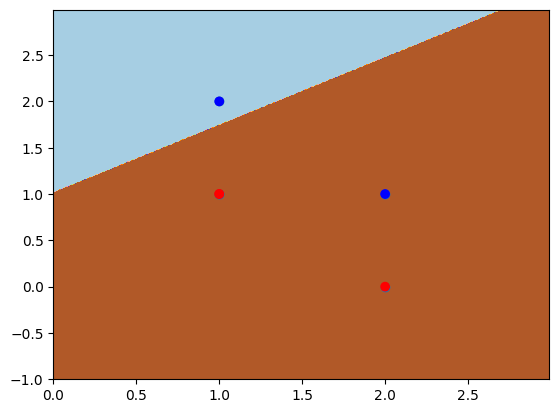

In [64]:
def predict(W, A):
    return (W@np.vstack([-np.ones((1, A.shape[1])), A])>=0).astype(int)

def plot(W, A):
    x_start, x_end=A[0, :].min()-1, A[0, :].max()+1
    y_start, y_end=A[1, :].min()-1, A[1, :].max()+1

    xx, yy=np.meshgrid(np.arange(x_start, x_end, 0.01), np.arange(y_start, y_end, 0.01))
    grid=np.vstack([xx.ravel(), yy.ravel()])

    Z=predict(W, grid).reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
    plt.scatter(A[0, :], A[1, :])

    plt.scatter(A[0, :], A[1, :], color=[["red", "blue"][C[0, i]] for i in range(A.shape[1])])
    plt.show()

plot(W, A)

Previously initialized perceptron can be trained by calling the function *trainlms_p* until correct (or satisfactory) segmentation (division) of the plain is achieved:

In [265]:
def trainlms_p(ni, x, d, W, max_epoch):
    w=W.copy()

    n=0
    errors=[]
    while (n<max_epoch):
        n+=1
        y=predict(w, x)
        e=d-y
        w+=ni*e@np.vstack([-np.ones((1, x.shape[1])), x]).T
        error=np.sum(np.square(e))
        errors.append(error)
        if (error<0.02):
            break
    return w, errors

**Tasks**

1. Plot the plane and positions of last vectors with the classification plane in two cases: before and after training. Are classes $C_1$ and $C_2$ correctly separated in both cases?  

    They were not correctly separated in the first case, but after training they were.


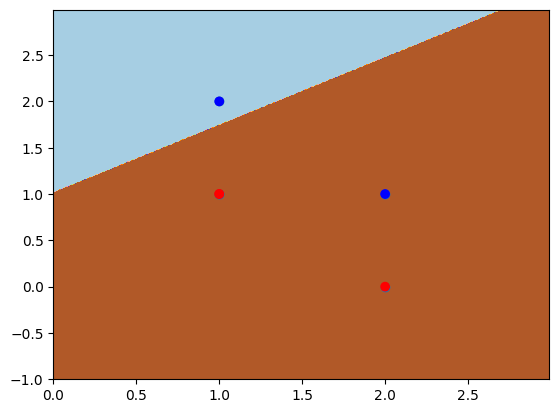

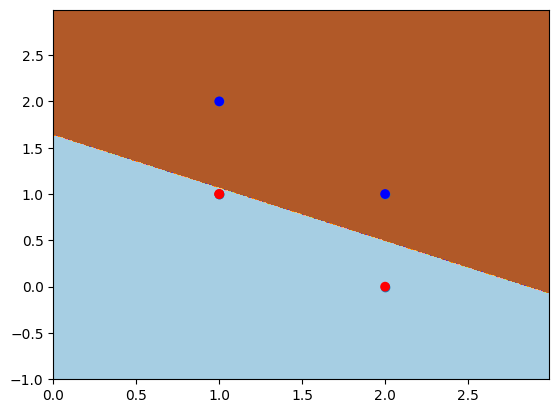

In [72]:
plot(W, A)
W_trained, errors = trainlms_p(ni=0.1, x=A, d=C, W=W, max_epoch=1000)
plot(W_trained, A) 

2. Show the segmentation error with regards to training iteration.  
    
    At the end error descends to zero.

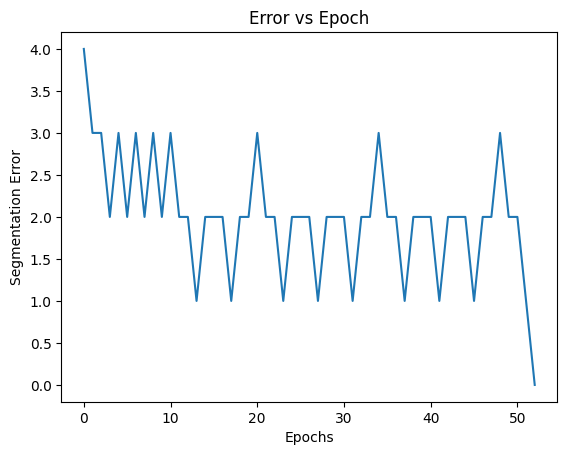

In [73]:
plt.plot(errors)
plt.xlabel('Epochs')
plt.ylabel('Segmentation Error')
plt.title('Error vs Epoch')
plt.show()

3. Think of an experiment where you will use the perceptron to find the border in 2D space and train the required perceptron.  

     Imagine a soccer field 120 m long and 90 m wide. On that soccer field, we have 2 teams of 11 players each. We have the position coordinates for each player, and we will try to divide them with a border.


Player Coordinates (A):
 [[ 32.92881024  42.91136198  36.16580256  32.69299098  25.41928796
   38.75364678  26.25523268  53.50638005  57.81976563  23.00649113
   47.50350228  87.68876174 106.83175058  67.09646555  98.39526128
   68.60119724 116.68013502  91.31089931  84.8797164   75.87333673
  106.45402137  87.36901993]
 [ 47.60054278  51.1240105   83.30369745   6.39324524   7.84163697
    1.81965577  74.9357861   70.03410759  78.30109334  88.0756508
   71.92427078  51.1590554    1.69108204  55.58719474  55.08861505
   55.52405972  84.93732707  61.36382692  32.35571105  39.33287584
   62.78680763   5.42029245]]

Labels (C):
 [[0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1]]
Starting weights (W):
 [[ 0.16676672  0.17063787 -0.28961744]]


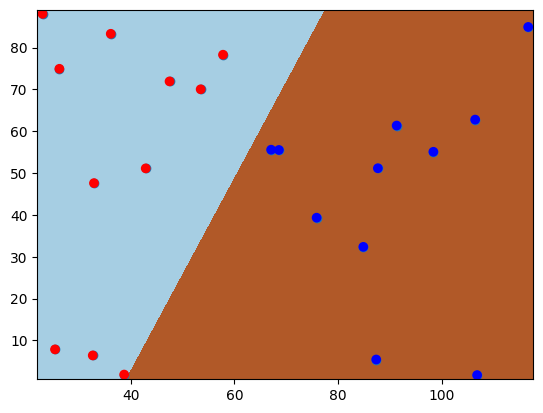

In [95]:
np.random.seed(0)

# Generate random player coordinates (2D points) for the soccer field
# 22 players: 11 with class 0, 11 with class 1

# Team 0: Generate 11 random points in the first half of the field (0-60m along x-axis, 0-90m along y-axis)
team_0 = np.vstack([np.random.uniform(0, 60, 11), np.random.uniform(0, 90, 11)])

# Team 1: Generate 11 random points in the second half of the field (60-120m along x-axis, 0-90m along y-axis)
team_1 = np.vstack([np.random.uniform(60, 120, 11), np.random.uniform(0, 90, 11)])

A = np.hstack([team_0, team_1])

C = np.matrix(np.hstack([[0]*11, [1]*11]))

print("Player Coordinates (A):\n", A)
print("\nLabels (C):\n", C)

W=initp(A, C)
print("Starting weights (W):\n", W)

W_trained, errors = trainlms_p(ni=0.0001, x=A, d=C, W=W, max_epoch=100000)
plot(W_trained, A)

4. Think of an experiment where you will use the perceptron to find the border in 3D space and train the required perceptron.  

    Imagine a space where drones fly. We have 2 teams of 3 drones.

In [120]:
# Generate 3D coordinates (x, y, z) for the drones

# Team 0: Generate 3 random points in the first half of the field (0-60m along x-axis, 0-90m along y-axis, 0-30m along z-axis)
team_0 = np.vstack([np.random.uniform(0, 60, 3), np.random.uniform(0, 90, 3), np.random.uniform(0, 30, 3)])

# Team 1: Generate 3 random points in the second half of the field (60-120m along x-axis, 0-90m along y-axis, 0-30m along z-axis)
team_1 = np.vstack([np.random.uniform(60, 120, 3), np.random.uniform(0, 90, 3), np.random.uniform(0, 30, 3)])

# Combine both teams into one array A (shape 3x6), where columns represent players
A = np.hstack([team_0, team_1])

C = np.matrix(np.hstack([[0]*3, [1]*3]))

# Print the player coordinates and labels
print("Drones Coordinates (A):\n", A)
print("\nLabels (C):\n", C)

W=initp(A, C)
print("Starting weights (W):\n", W)

W_trained, errors = trainlms_p(ni=0.0001, x=A, d=C, W=W, max_epoch=100000)

print("Trained weights (W_trained):\n", W_trained)

Drones Coordinates (A):
 [[ 17.52867891  21.9817106   27.36419905  70.23144742  63.90309558
  116.93313224]
 [ 70.66583653  17.97064039  46.28109946  86.90688298  72.75576133
   27.41523923]
 [ 17.77243707   1.39351238  18.22634556   2.93016342  20.5269908
   13.20457481]]

Labels (C):
 [[0 0 0 1 1 1]]
Starting weights (W):
 [[-0.37796177 -0.00482309 -0.46561148  0.4093204 ]]
Trained weights (W_trained):
 [[-0.30946177  0.03280258 -0.02267076 -0.0044174 ]]


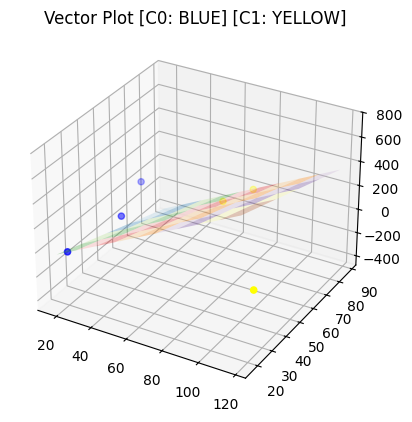

In [122]:
def predict(W, A):
    X = np.vstack([np.ones((1, A.shape[1])), A])  
    return (W @ X >= 0).astype(int)  # compare with 0

def plot(W, A):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(A[0, :], A[1, :], A[2, :], c=["blue" if C[0, i] == 0 else "yellow" for i in range(A.shape[1])])  # plot drones positions

    x_range = np.linspace(A[0, :].min() - 1, A[0, :].max() + 1, 10)
    y_range = np.linspace(A[1, :].min() - 1, A[1, :].max() + 1, 10)
    xx, yy = np.meshgrid(x_range, y_range)
    zz = (-W[0, 0] - W[0, 1] * xx - W[0, 2] * yy) / W[0, 3]

    ax.plot_surface(xx, yy, zz, alpha=0.3, cmap=plt.cm.Paired)
    plt.title("Vector Plot [C0: BLUE] [C1: YELLOW]")
    plt.show()

plot(W_trained, A)

### 3.1.2 Linearly inseparable case in 2D

In this experiment we will try to train a perceptron for two linearly inseparable classes. To be more precise, we will try to solve the logical XOR function problem. Input vectors ai will represent the function inputs and classes $C_0$ and $C_1$ will represent the function values:

In [309]:
# bring back 2d plot function
def predict(W, A):
    return (W@np.vstack([-np.ones((1, A.shape[1])), A])>=0).astype(int)

def plot(W, A):
    x_start, x_end=A[0, :].min()-1, A[0, :].max()+1
    y_start, y_end=A[1, :].min()-1, A[1, :].max()+1

    xx, yy=np.meshgrid(np.arange(x_start, x_end, 0.01), np.arange(y_start, y_end, 0.01))
    grid=np.vstack([xx.ravel(), yy.ravel()])

    Z=predict(W, grid).reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
    plt.scatter(A[0, :], A[1, :])

    plt.scatter(A[0, :], A[1, :], color=[["red", "blue"][C[0, i]] for i in range(A.shape[1])])
    plt.show()

In [142]:
A=np.array([[0, 0, 1, 1], [0, 1, 0, 1]])
C=np.array([[0, 1, 1, 0]])

**Tasks**

1. Use the same training procedure from the first experiment. Plot the obtained results (i.e. plot the input vectors before and after the training phase in the same window). Plot the error as well.
2. Did perceptron learn to solve the XOR problem? Explain why.  

    No, it did not learn to solve the XOR problem because XOR is not linearly separable, and the perceptron is a linear classifier. Error is never 0 on the last plot.

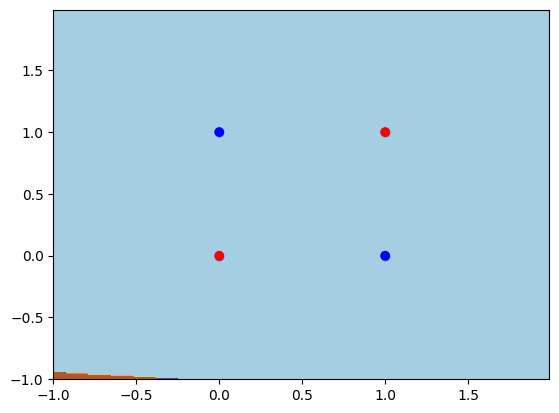

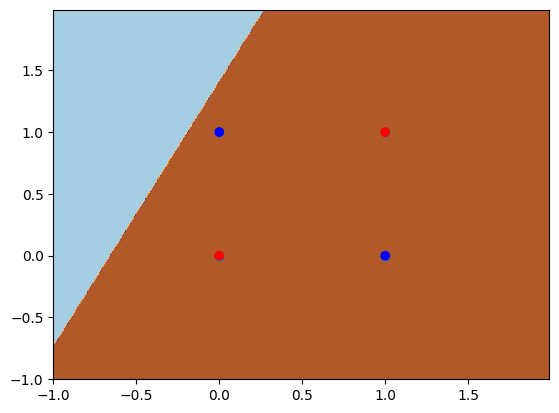

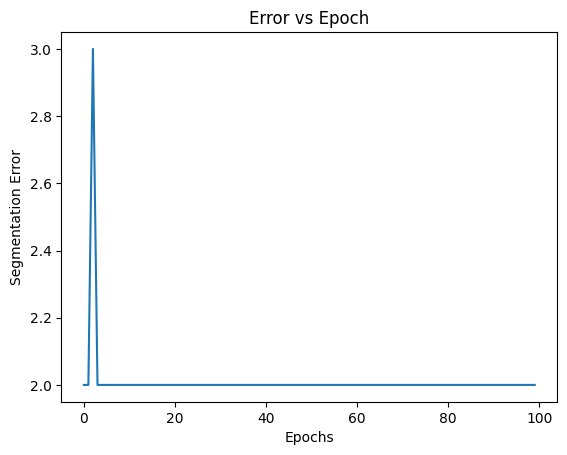

In [148]:
# Write your code here
W=initp(A, C)
plot(W, A)
W_trained, errors = trainlms_p(ni=0.1, x=A, d=C, W=W, max_epoch=100)
plot(W_trained, A) 

plt.plot(errors)
plt.xlabel('Epochs')
plt.ylabel('Segmentation Error')
plt.title('Error vs Epoch')
plt.show()

### 3.1.3 Classification of linearly separable examples in 3D space

This experiment shows how to classify examples in 3D space. Input vectors are three dimensional and belong to 2 classes which are linearly separable. Input vectors are:

In [312]:
a1=np.array([[0, 0, 0]]).T
a2=np.array([[0, 0, 1]]).T
a3=np.array([[0, 1, 0]]).T
a4=np.array([[0, 1, 1]]).T
a5=np.array([[1, 0, 0]]).T

A=np.hstack([a1, a2, a3, a4, a5])  
C=np.array([[0, 1, 0, 0, 1]])

Here, vectors $\mathbf{a}_1$, $\mathbf{a}_3$ and $\mathbf{a}_4$ belong to class $C_0$ and other vectors belong to class $C_1$.

**Tasks**

1. Repeat the learning procedure from 3.1.1. and show the obtained results with plot of the error.
2. Change the vector classes until classes $C_0$ and $C_1$ become linearly inseparable. When does this happen?

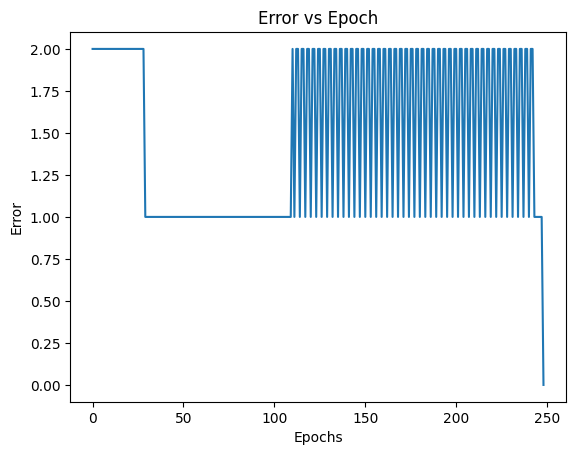

0

In [313]:
def initp(data, labels):
    return -0.5+np.random.rand(labels.shape[0], data.shape[0]+1)

W=initp(A, C)
W_trained, errors = trainlms_p(ni=0.001, x=A, d=C, W=W, max_epoch=1000)

plt.plot(errors)
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.title('Error vs Epoch')
plt.show()
errors[-1]

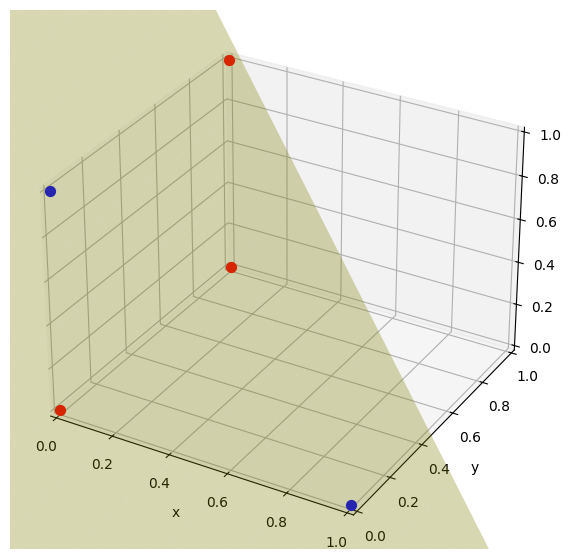

In [340]:
def predict(W, A):
    return (W @ np.vstack([-np.ones((1, A.shape[1])), A]) >= 0).astype(int)

def plot_3d(W, A, C):
    W = W.flatten()

    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')

    # saving the initial axis limits because it is displayed better this way
    x_lim = ax.get_xlim()
    y_lim = ax.get_ylim()
    z_lim = ax.get_zlim()

    for i in range(A.shape[1]):
        color = "red" if C[0, i] == 0 else "blue"
        ax.scatter(A[0, i], A[1, i], A[2, i], color=color, s=50)

    x_min, x_max = A[0, :].min() - 1, A[0, :].max() + 1
    y_min, y_max = A[1, :].min() - 1, A[1, :].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 30), np.linspace(y_min, y_max, 30))
    zz = (-W[0] - W[1] * xx - W[2] * yy) / W[3]
    ax.plot_surface(xx, yy, zz, color='yellow', alpha=0.3)

    ax.set_xlim(x_lim)
    ax.set_ylim(y_lim)
    ax.set_zlim(z_lim)
    
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("z")
    plt.show()

plot_3d(W_trained, A, C)  # wanted to visualize the dots in the space
    

2. Change the vector classes until classes $C_0$ and $C_1$ become linearly inseparable. When does this happen?  

    This happens when the dots are labeled in a way that no straight boundary can separate them. In the example below error was never 0 and the final error was 2 even if 10000 iterations were used.  
    The previous problem; the XOR example in 2D that was not linearly separable, it can be if we look at the problem in 3D and lay dots from class C0 on the z=0 plane, and the ones from class C1 on the z=1 plane.

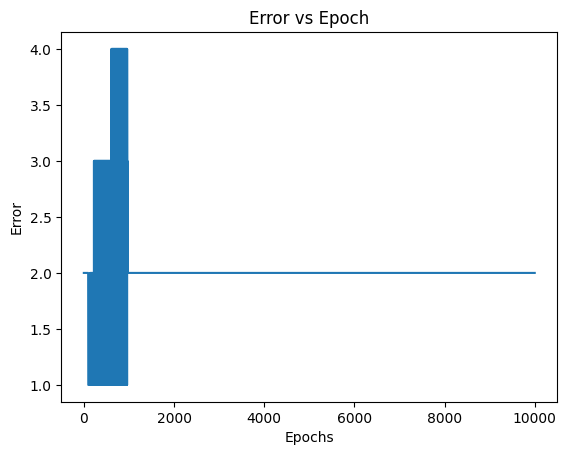

2

In [343]:
C = np.array([[0, 1, 1, 0, 1]])
W=initp(A, C)
W_trained, errors = trainlms_p(ni=0.001, x=A, d=C, W=W, max_epoch=10000)

plt.plot(errors)
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.title('Error vs Epoch')
plt.show()
errors[-1]

## 3.2 Classification of examples with Gaussian distribution

The second part of this exercise tries to show how to classify examples with Gaussian distribution, which can be typically found in real life problems.

Suppose we have two classes of 2D vectors, where each class represents the realization of the random vector with Gaussian distribution. We will set the mean value and standard deviation of the first class to $E(C_0)=(10, 10)$ and $S(C_0)=2.5$ for each of the components. The second class will have the expected value $E(C_1)=(20, 5)$ and standard deviation $S(C_1)=2$. Create 100 vectors for each class as follows:

In [211]:
A1=np.random.normal((10, 10), (2.5, 2.5), size=(100,2)).T
A2=np.random.normal((20, 5), (2, 2), size=(100,2)).T

After this step we have to construct the matrix $\mathbf{A}$ containing vectors $\mathbf{A}_1$ and $\mathbf{A}_2$. We have to form the vector $\mathbf{C}$ which says that first that 100 elements belong to class $C_0$ and other elements belong to class $C_1$:

In [212]:
A=np.hstack([A1, A2])
C=np.hstack([np.zeros((1,100)), np.ones((1, 100))]).astype(int)

**Tasks**

1. Repeat the training procedure from the first part of the exercise. Plot the obtained results.
2. How many examples were misclassified? 4
3. If the input vector is given as $\mathbf{a}_i$=(10,3) where would we classify this example? blue - C1

In [213]:
# bring back 2d plot function
def predict(W, A):
    return (W@np.vstack([-np.ones((1, A.shape[1])), A])>=0).astype(int)

def plot(W, A):
    x_start, x_end=A[0, :].min()-1, A[0, :].max()+1
    y_start, y_end=A[1, :].min()-1, A[1, :].max()+1

    xx, yy=np.meshgrid(np.arange(x_start, x_end, 0.01), np.arange(y_start, y_end, 0.01))
    grid=np.vstack([xx.ravel(), yy.ravel()])

    Z=predict(W, grid).reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
    plt.scatter(A[0, :], A[1, :])

    plt.scatter(A[0, :], A[1, :], color=[["red", "blue"][C[0, i]] for i in range(A.shape[1])])
    plt.show()

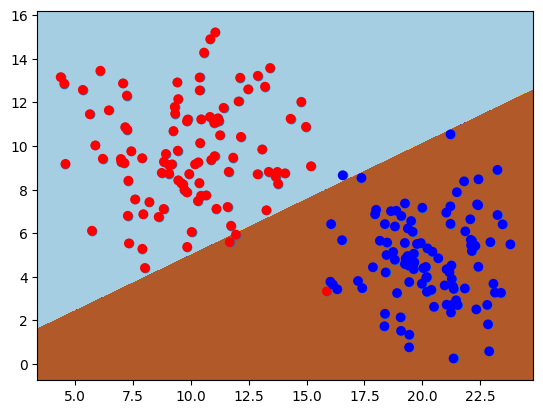

4


In [214]:
# Write your code here
W=initp(A, C)
W_trained, errors = trainlms_p(ni=0.1, x=A, d=C, W=W, max_epoch=100)
plot(W_trained, A) 
print(errors[-1]) # how many examples were misclassified

### 3.3.1 Classification of examples using two perceptrons

The third part of the exercise shows how to use more than one perceptron in order to classify input vectors in larger number of classes. In Figure 4 we can see a network with two perceptrons which can be used in order to classify the examples in four linearly inseparable classes.

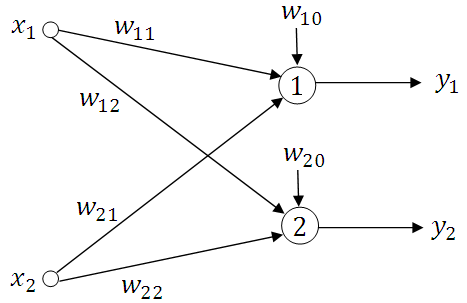

Figure 4. Two perceptrons for classification in four classes (outputs are binary coded)

Suppose we have 10 2D input vectors defined with matrix $\mathbf{A}$ where each column of the matrix represents one input vector:

In [215]:
A=np.array([[0.1, 0.7, 0.8, 0.8, 1.0, 0.3, 0.0, -0.3, -0.5, -1.5], [1.2, 1.8, 1.6, 0.6, 0.8, 0.5, 0.2, 0.8, -1.5, -1.3]])

Matrix $\mathbf{C}$ is used to define in which class each input vector belongs to:

In [216]:
C=np.array([[1, 1, 1, 0, 0, 1, 1, 1, 0, 0], [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]]);

Each column of the matrix $\mathbf{C}$ is a 2D vector, where each two bits represent the binary coded class value for each input vector. Using two bits we can binary code four different values, which represent the class names: $C_0$, $C_1$, $C_2$, $C_3$. This network is trained using the same procedure used for the network with only one perceptron.

**Tasks**

1. Train the network. Plot the obtained results with plot of the error.

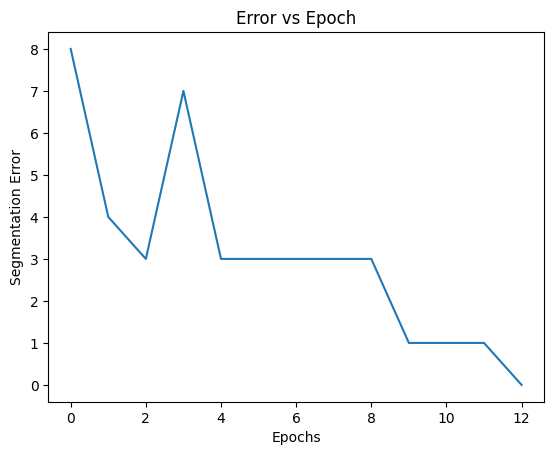

In [218]:
# Write your code here
W=initp(A, C)
W_trained, errors = trainlms_p(ni=0.1, x=A, d=C, W=W, max_epoch=100)
#plot(W_trained, A)

plt.plot(errors)
plt.xlabel('Epochs')
plt.ylabel('Segmentation Error')
plt.title('Error vs Epoch')
plt.show()

# Exercise 4: LMS algorithm for stock price prediction

## 4.1 Introduction

In this exercise the *trainlms* function given below will be used.

**Tasks**

1. What does the function *trainlms* do?  

    The function trains a linear model to fit a dataset by adjusting the weights in iterations to minimize the difference between the predicted and actual outputs. It's a form of the LMS algorithm to find weights that result in minimal error for a linear regression or classification problem like we used it previously.

In [380]:
def predict(W, A):
    return W@np.vstack([-np.ones((1, A.shape[1])), A])

def trainlms(ni, x, d, W, max_epoch):
    w=W.copy()

    n=0
    errors=[]
    while (n<max_epoch):
        n+=1
        y=predict(w, x)
        e=d-y
        w+=ni*e@np.vstack([-np.ones((1, x.shape[1])), x]).T
        error=np.sum(np.square(e))
        errors.append(error)
        if (error<0.02):
            break
    return w, errors

## 4.2 Stock price movement

Download stock.txt file from the course web pages.

If your are using Google Colaboratory instead of running the notebook locally, upload the file on your Google Drive and run the following cell:

In [ ]:
# from google.colab import drive
# drive.mount('/content/gdrive')

In this experiment we will use the LMS algorithm in order to predict the stock price for a given stock. Load the data from file *stock.txt* into variable *data*. Numbers (elements of vector *data*) show the movement of average daily price of the given share in time. Plot the variable *data* using the following commands:

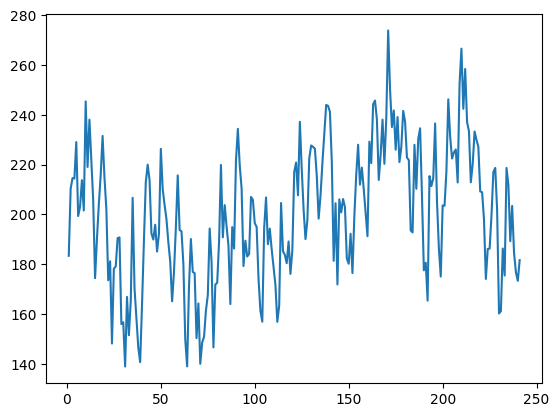

In [358]:
# Loading data from a file for a local notebook
data=np.loadtxt("stock.txt", delimiter=",")

# Loading data from a file for a Colab notebook
# data=np.loadtxt("/content/gdrive/My Drive/Notebooks/stock.txt", delimiter=",")

import matplotlib.pyplot as plt
plt.plot(range(1, data.shape[0]+1), data)
plt.show()

The goal of this exercise is to use several (let us say $N$) previous share prices in order to predict the share price for today. This is useful because we can buy or sell the price before its price rises or falls and in that way increase our profit or lower our loss. The first step is to find the input-output pairs, which will be used on order to train our network. The size of this set will be defined using variable $i$. Our inputs will be vectors $\mathbf{a}_i$, which we put in matrix $\mathbf{A}$. Outputs are scalar values, which we put in vector $y$.

**Tasks**

1. Write the function *memory*, which for given day in the year (index of the variable *data*) constructs a column vector $\mathbf{a}$ whose elements represent the prices for last *N* days but without the price for today.
2. Using the function *memory* write a function *memorize*, which for given inputs (*data*, *day*, *N*, *i*) constructs the matrix $\mathbf{A}$ in which each column vector represents the $\mathbf{a}_i$ for the previous day. So, matrix $\mathbf{A}$ memorizes $i$ memories which we will use in order to train our network.

In [359]:
# Write your code here
def memory(data, day, N):
    return data[day - N: day].reshape(N, 1)

def memorize(data, day, N, i):
    memories = []
    for idx in range(i):
        a_i = memory(data, day - idx, N)
        memories.append(a_i) 

    return np.hstack(memories)

Construct the matrix $\mathbf{A}$ using the command:

In [400]:
day=151
N=70
i=50
A=memorize(data, day, N, i)

The output vector is constructed using the command:

In [401]:
y=np.array([data[day-i+1:day+1]])

We initialize the perceptron as follows:

In [402]:
def initp(data, labels):
    return -0.5+np.random.rand(labels.shape[0], data.shape[0]+1)

W=initp(A, y)

We train the perceptron using the command:

In [403]:
ni=1e-8
max_num_iter=10000

W1, errors=trainlms(ni, A, y, W, max_num_iter)

Weights of the network are memorized in the matrix $\mathbf{W}_1$. Variable *ni* should be experimentally found. Train the network for different values of *i*, *N*, *max_num_iter*. We can visualize the output of the network on the training data using the following command:

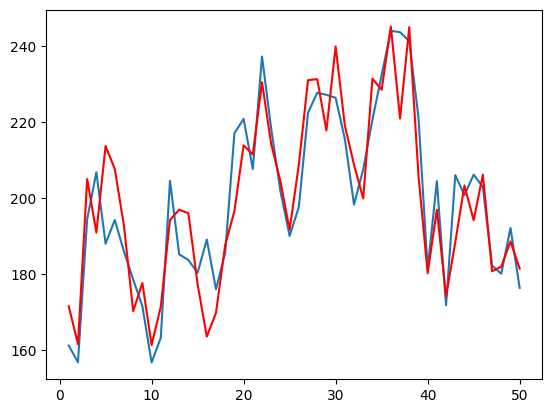

In [364]:
p=predict(W1, A)

plt.plot(range(1, y[0].shape[0]+1), y[0])
plt.plot(range(1, p[0].shape[0]+1), p[0], c="red")
plt.show()

Here, the blue color shows the predicted values and the red color shows the real outputs.

**Tasks**

1. Memorize different weight matrices ($\mathbf{W}_1$, $\mathbf{W}_2$...) with different combinations of following parameters *i*=30, 50 or 100; *N*=20, 50 or 80; *max_num_iter*=10000, 50000 or 500000. (Choose 6 different combinations.) For selected parameter combinations show the obtained predictions with real values. Comment the obtained results.  

    Based on the plots and final error values (last iteration error), the best combination was the last one. It had the smallest error and the obtained predictions were the most similar to the real values.  
    Looking at a first 2 pictures we can see how better the prediction was just because the N param for last N days was larger.  
    Combinations 3 and 4 are interesting because in the same number of iterations, better results were given with smaller i and bigger N param.  
    And for the last two, it was expected that in more iterations, prediction would be better based on prolonged learning.

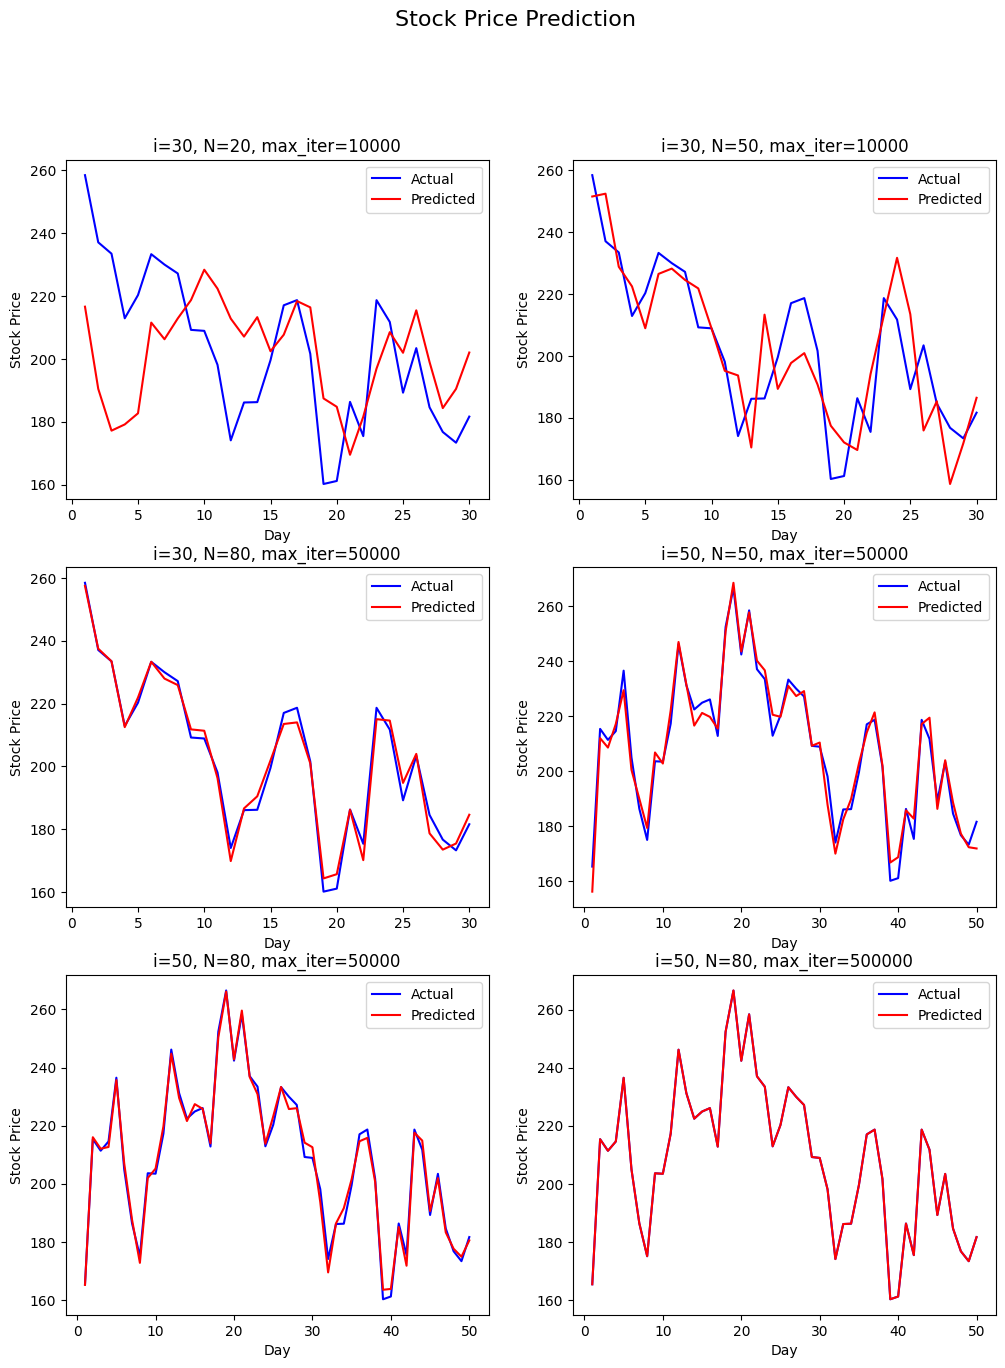

[Combination 1 Final Error]: 18299.53668068292
[Combination 2 Final Error]: 6202.400501149405
[Combination 3 Final Error]: 277.8622371600756
[Combination 4 Final Error]: 958.2692394733853
[Combination 5 Final Error]: 262.3056295004415
[Combination 6 Final Error]: 0.0199996565201442


In [430]:
# Write your code here
import matplotlib.pyplot as plt

# Define combinations for i, N, and max_num_iter
combinations = [
    (30, 20, 10000),
    (30, 50, 10000),
    (30, 80, 50000),
    (50, 50, 50000),
    (50, 80, 50000),
    (50, 80, 500000)
]

final_errors = []
plt.figure(figsize=(12, 15))
plt.suptitle("Stock Price Prediction", fontsize=16)

for idx, (i, N, max_num_iter) in enumerate(combinations):
    plt.subplot(3, 2, idx + 1)
    
    day = len(data) - 1
    A = memorize(data, day, N, i)
    y = np.array([data[day-i+1:day+1]])
    W = initp(A, y)
    W_trained, errors = trainlms(ni, A, y, W, max_num_iter)
    final_errors.append(errors[-1])

    p = predict(W_trained, A)
    plt.plot(range(1, y[0].shape[0] + 1), y[0], label="Actual", color="blue")
    plt.plot(range(1, p[0].shape[0] + 1), p[0], label="Predicted", color="red")
    plt.title(f"i={i}, N={N}, max_iter={max_num_iter}")
    plt.xlabel("Day")
    plt.ylabel("Stock Price")
    plt.legend()

plt.show()

for idx, error in enumerate(final_errors):
    print(f"[Combination {idx+1} Final Error]: {error}")


If we do not use any intelligence for stock price prediction and we assume the price will be (almost) the same tomorrow, the error we make is:

In [414]:
a=data[day:day+1]          # price today - we assume the same price tomorrow
y=data[day+1:day+2]        # the real price tomorrow
err_oo=np.sum(np.abs(y-a)) # error

If we use the network trained on previous days to predict the price for tomorrow, the error is as follows:

In [410]:
p=predict(W1, memorize(data, day+1, N, 1))
err_nn=np.sum(np.abs(y-p))

If we trade each day with the given stock, our error can be easily measured. Our potential profit can be calculated as follows:

In [411]:
profit=err_oo-err_nn
print(profit)

16.391162101552396


To predict the price of the day after tomorrow, we could use the same network or we could train the network from scratch by also using the data of the day before the day after tomorrow i.e. by using the data of tomorrow. Which way would be better?  

We can use the same network to avoid extra work, but new data when training new network could make predictions more accurate, and the network would adjust to the latest data...of course there is a risk of overfitting, since at the start of the task we could see the plot of the data, and the data was quite dynamic.

**Tasks**

1. Create a table in which you will show the obtained profit levels depending on the parameters used (*i*, *N*, and *max_num_iter*). For of these parameter triplets the profit should be the sum of the profit for every possible *day* for which training data defined by *i* and *N* exists.

In [458]:
def calculate_profit(data, i, N, max_num_iter):
    # Initialize start day based on required data for training
    day_start = N + i
    total_profit = 0

    # Calculate profit for each day
    for day in range(day_start, len(data) - 1):
        A = memorize(data, day + 1, N, i)
        y_train = np.array([data[day - i + 1: day + 1]])
        W = initp(A, y_train)
        W_trained, _ = trainlms(1e-8, A, y_train, W, max_num_iter)
        
        y = data[day + 1: day + 2]
        p = predict(W_trained, memorize(data, day + 1, N, 1))
        err_nn = np.sum(np.abs(y - p))  # Error using the neural network

       
        a = data[day: day + 1]  # price today
        err_oo = np.sum(np.abs(y - a))  # Error assuming the price remains the same

        # Calculate the profit for this day
        profit = err_oo - err_nn
        total_profit += profit

    return total_profit


combinations = [
    (30, 20, 10000),
    (30, 50, 10000),
    (30, 80, 10000),
    (50, 50, 10000),
    (50, 80, 10000),
    (50, 80, 50000)
]

profit_table = {}
for i, N, max_num_iter in combinations:
    profit = calculate_profit(data, i, N, max_num_iter)
    profit_table[(i, N, max_num_iter)] = profit

In [459]:
import pandas as pd

profit_data = []
for key, profit in profit_table.items():
    i, N, max_num_iter = key
    profit_data.append([i, N, max_num_iter, profit])

profit_df = pd.DataFrame(profit_data, columns=["i", "N", "max_num_iter", "Profit"])
print(profit_df)

    i   N  max_num_iter       Profit
0  30  20         10000 -1356.214579
1  30  50         10000 -1735.607356
2  30  80         10000 -1644.004420
3  50  50         10000 -1385.378313
4  50  80         10000 -1338.674351
5  50  80         50000 -1292.800260


I don't think this simple perceptron is smart enough for us to except a greater "profit". 